In [1]:
import sys
import os
import matplotlib.pyplot as plt
% matplotlib inline
import pickle
# Import class
parent_dir = os.path.dirname(os.path.dirname(os.getcwd()))
class_dir = os.path.join(parent_dir, 'Scripts')
sys.path.insert(0, class_dir)
import NBAStats
import numpy as np
import datetime as dt
import random
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

stats_file = os.path.join(parent_dir, 'Data', 'nba_stats.pickle')
print(stats_file)
nba_stats = pickle.load(open(stats_file, 'rb'))

C:\Users\johnn\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\johnn\Desktop\github\nba_stats\Data\nba_stats.pickle


# Christmas game effect
Do players play differently on Christmas day?
For each player who's played on christmas day, compare how they've performed against their previous 50 game average.

In [49]:
df_excess = pd.DataFrame()

for year in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]:
    christmas_day = dt.date(year, 12, 25)
    games_info = nba_stats.get_games().copy()

    # Convert GAME_DATE from str to dt.date
    games_info['GAME_DATE'] = games_info['GAME_DATE'].apply(
        lambda date: dt.datetime.strptime(date[:10], '%Y-%m-%d'))

    xmas_games = games_info[games_info['GAME_DATE'] == christmas_day]
    xmas_game_ids = xmas_games['GAME_ID'].unique()
    
    for game_id in xmas_game_ids:

        game_boxscore = nba_stats.get_boxscores()[game_id]
        player_ids = game_boxscore['PLAYER_ID']

        for player_id in player_ids:

            df_player = nba_stats.get_player_stats()[player_id]
            df_player = df_player[df_player.index <= christmas_day].sort_index().tail(51)
            player_name = df_player['PLAYER_NAME'][0]

            df_player = df_player[['PTS', 'AST', 'REB']]
            xmas_stats = df_player.iloc[-1]
            avg_prev_stats = df_player.iloc[:50].mean()

            xmas_excess = pd.DataFrame(xmas_stats.subtract(avg_prev_stats)).T
            xmas_excess['PLAYER_NAME'] = player_name
            xmas_excess['DATE'] = christmas_day

            df_excess = df_excess.append(xmas_excess)

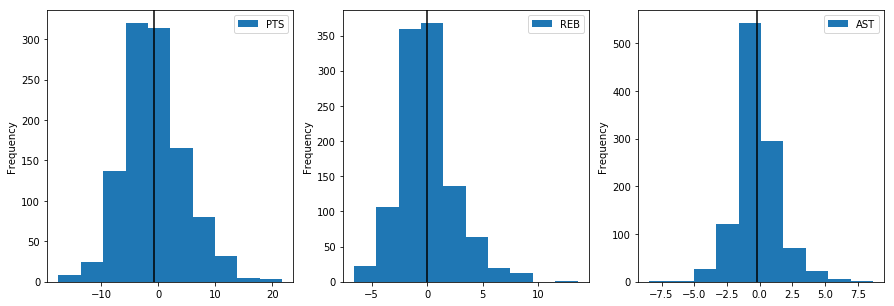

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, stat in enumerate(['PTS', 'REB', 'AST']):
    
    df_excess.plot(y=stat, kind='hist', ax=ax[i])
    ax[i].axvline(df_excess[stat].mean(), color='black')

## Conclusion
There doesn't seem to be any significant difference between how players play on Christmas compared to other regular season games. Not going to pursue this analysis any further